In [1]:
%pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


Epoch 0, Loss: 0.1396
Epoch 10, Loss: 0.1345
Epoch 20, Loss: 0.1295
Epoch 30, Loss: 0.1247
Epoch 40, Loss: 0.1200
Epoch 50, Loss: 0.1154
Epoch 60, Loss: 0.1109
Epoch 70, Loss: 0.1066
Epoch 80, Loss: 0.1024
Epoch 90, Loss: 0.0984


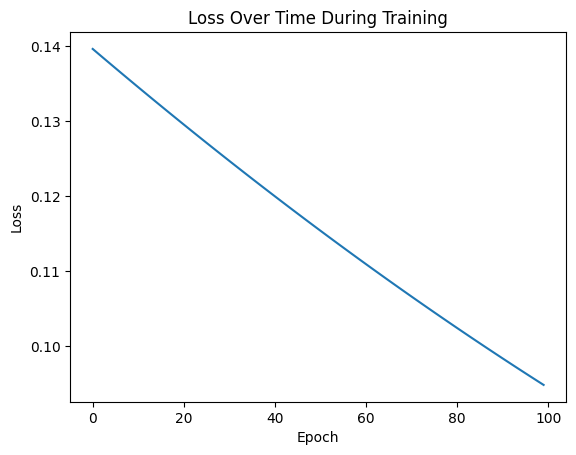

In [2]:
import numpy as np
import matplotlib.pyplot as plt  # Importing matplotlib for visualization

# Explanation: 
# NumPy is imported to help us perform mathematical operations efficiently. 
# We'll use it to store the input, weights, and calculate matrix operations like dot products.

# Step 1: Initialize the weights
# Explanation: 
# We define random small weights for the input-to-hidden and hidden-to-output connections.
# The random weights simulate the initial guess of the neural network.
weights_input_hidden = np.random.randn(1, 2)  # 1 input, 2 hidden neurons
weights_hidden_output = np.random.randn(2, 1)  # 2 hidden neurons, 1 output neuron

# Explanation:
# weights_input_hidden is a matrix of size (1, 2) because there is 1 input neuron and 2 neurons in the hidden layer.
# weights_hidden_output is a matrix of size (2, 1) because there are 2 neurons in the hidden layer and 1 output neuron.


# Step 2: Activation Functions
# Explanation: 
# We define two activation functions: ReLU for the hidden layer and Sigmoid for the output layer.
# These functions help the neurons decide whether to pass signals forward based on the input.

def relu(x):
    # Explanation: ReLU returns the input if it's positive; otherwise, it returns 0. 
    # It introduces non-linearity to the network, which is crucial for learning complex patterns.
    return np.maximum(0, x)

def sigmoid(x):
    # Explanation: Sigmoid squashes the input into a range between 0 and 1.
    # It's used in the output layer, especially for binary classification tasks.
    return 1 / (1 + np.exp(-x))


# Step 3: Forward Pass
# Explanation: 
# The forward pass is when the input data moves through the network to make predictions. 
# It involves multiplying inputs by weights and applying activation functions.

def forward_pass(inputs, weights_input_hidden, weights_hidden_output):
    # Hidden Layer
    hidden_layer_input = np.dot(inputs, weights_input_hidden)
    hidden_layer_output = relu(hidden_layer_input)
    
    # Output Layer
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    output = sigmoid(output_layer_input)
    
    # Explanation:
    # np.dot(inputs, weights_input_hidden) performs the matrix multiplication between the inputs and hidden layer weights.
    # The ReLU activation function is applied to the hidden layer output to add non-linearity.
    # Then, the hidden layer output is multiplied by the weights of the hidden-to-output connection.
    # The Sigmoid function is applied to the final result to produce the network's prediction.
    
    return output, hidden_layer_output


# Step 4: Loss Function
# Explanation:
# The loss function calculates the difference between the network's prediction and the true output.
# We'll use Mean Squared Error (MSE), which calculates the average squared difference between predicted and actual values.

def mse_loss(y_true, y_pred):
    # Explanation:
    # y_true: The actual value or target.
    # y_pred: The value predicted by the network.
    # We return the mean of the squared differences between predicted and actual values.
    return np.mean((y_true - y_pred) ** 2)


# Step 5: Backward Pass and Weight Updates
# Explanation: 
# In this step, we calculate how the loss changes with respect to the weights (gradients), 
# then adjust the weights to reduce the error using gradient descent.

def backward_pass(inputs, hidden_layer_output, output, y_true, weights_input_hidden, weights_hidden_output, learning_rate=0.01):
    # Calculate the output error (Gradient of loss with respect to the output)
    output_error = output - y_true  # This is the difference between predicted and actual values
    
    # Explanation:
    # output_error is how far off the prediction is from the actual target value.
    # The network needs to minimize this error to make better predictions in future iterations.
    
    # Calculate gradients for hidden-to-output weights
    sigmoid_derivative = output * (1 - output)  # Derivative of the Sigmoid function
    hidden_output_gradient = hidden_layer_output.T.dot(output_error * sigmoid_derivative)
    
    # Explanation:
    # The gradient for the weights between the hidden and output layer is calculated by multiplying the hidden layer output 
    # by the derivative of the output error. This helps us figure out how to adjust the weights in the right direction.
    
    # Calculate gradients for input-to-hidden weights
    relu_derivative = hidden_layer_output > 0  # Derivative of ReLU function
    hidden_error = output_error.dot(weights_hidden_output.T) * relu_derivative
    input_hidden_gradient = inputs.T.dot(hidden_error)
    
    # Explanation:
    # The gradient for the input-to-hidden weights is calculated similarly by using the derivative of the ReLU function.
    # We calculate how much the hidden layer's error contributes to the overall error, then adjust the input-to-hidden weights accordingly.
    
    # Update the weights
    weights_hidden_output -= learning_rate * hidden_output_gradient
    weights_input_hidden -= learning_rate * input_hidden_gradient
    
    # Explanation:
    # We update the weights by subtracting a small portion of the gradient (controlled by the learning rate) from the current weights.
    # This gradual update helps the network reduce its error over time.


# Step 6: Training Loop
# Explanation:
# The training loop will execute the forward pass, calculate the loss, run the backward pass to adjust the weights, 
# and repeat this process for a number of iterations (epochs).

def train(inputs, y_true, weights_input_hidden, weights_hidden_output, epochs=100):
    loss_history = []  # To store loss at each epoch
    for epoch in range(epochs):
        # Forward pass
        output, hidden_layer_output = forward_pass(inputs, weights_input_hidden, weights_hidden_output)
        
        # Calculate the loss
        loss = mse_loss(y_true, output)
        loss_history.append(loss)  # Track loss over time
        
        # Backward pass and weight updates
        backward_pass(inputs, hidden_layer_output, output, y_true, weights_input_hidden, weights_hidden_output)
        
        # Print the loss at regular intervals to track progress
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
            
        # Plot the loss curve after training
    plt.plot(loss_history)
    plt.title("Loss Over Time During Training")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

# Explanation:
# In each epoch (iteration), the forward pass calculates the prediction, the loss is computed, 
# and the backward pass adjusts the weights to minimize the loss.
# We print the loss every 10 epochs to see how well the network is learning.


# Step 7: Running the Training
# Explanation: 
# We'll train the network using a simple input and true output.

inputs = np.array([[1]])  # Single input value
y_true = np.array([[0]])  # Target output (e.g., for a binary classification task)

# Initialize random weights again for this particular run
weights_input_hidden = np.random.randn(1, 2)
weights_hidden_output = np.random.randn(2, 1)

# Train the network for 100 epochs
train(inputs, y_true, weights_input_hidden, weights_hidden_output)

# Explanation:
# We use a simple input (1) and a target output (0). After 100 epochs, the network will adjust its weights to predict better. 
# You'll observe that the loss decreases over time as the network improves its predictions.
